# Notes
### Recap of Week 1

3 Common Types of Machine Learning 

    - Supervised: Learn to predict target values from labelled data
    - Unsupervised: Find structure in unlabeled data
    - Reinforcement: Take actions in an environment to maximaize cumulative reward
    
Generalization

    - The difference between training accuracy and testing accuracy
    - Number of data samples & model complexity
    - Overfitting & underfitting
    
### Week 2 Notes

    - Representation: Extract and select object features
    - Train models: Fit the estimator to the data
    - Evaluation
    - Refine: Feature and model refinement
    
A nearest neighbor algorithm

    1. A distance metric - typically Euclidean
    2. How many "nearest" neighbors to look at?
    3. Optional weighting function on the neighbor points
    
smaller k means more complex model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.random()

0.9848338151105788

In [3]:
np.random.seed(0)

In [4]:
for _ in range(10):
    print(np.random.random())

0.5488135039273248
0.7151893663724195
0.6027633760716439
0.5448831829968969
0.4236547993389047
0.6458941130666561
0.4375872112626925
0.8917730007820798
0.9636627605010293
0.3834415188257777


In [5]:
np.random.seed(0)

feature1 = []
feature2 = []
for _ in range(100):
    feature1.append(np.random.random())
    feature2.append(np.random.random())
    

In [6]:
df = pd.DataFrame({'feature1': feature1, 'feature2': feature2})

In [7]:
df.head()

,feature1,feature2
0,0.548814,0.715189
1,0.602763,0.544883
2,0.423655,0.645894
3,0.437587,0.891773
4,0.963663,0.383442


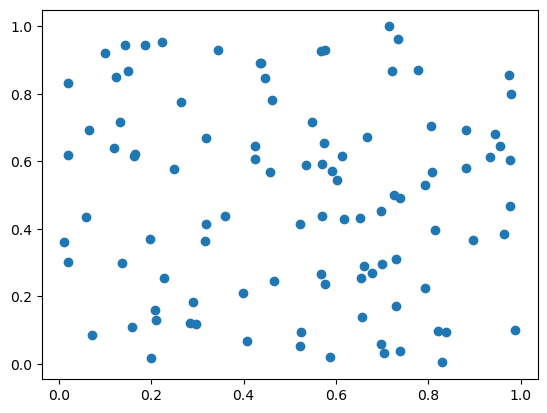

In [8]:
plt.scatter(df['feature1'], df['feature2'])

In [9]:
feature1 = []
feature2 = []
for _ in range(100):
    feature1.append(np.random.random() + 0.5)
    feature2.append(np.random.random() + 0.6)
    
df2 = pd.DataFrame({'feature1': feature1, 'feature2': feature2})

In [10]:
df['label'] = 0
df2['label'] = 1

In [11]:
df.head()

,feature1,feature2,label
0,0.548814,0.715189,0
1,0.602763,0.544883,0
2,0.423655,0.645894,0
3,0.437587,0.891773,0
4,0.963663,0.383442,0


In [12]:
df2.head()

,feature1,feature2,label
0,0.811796,1.296343,1
1,0.877752,0.779604,1
2,0.524679,0.667250,1
3,1.179393,1.053697,1
4,1.036579,1.496671,1


In [13]:
final_df = pd.concat([df, df2], ignore_index = True)

In [14]:
final_df

,feature1,feature2,label
0,0.548814,0.715189,0
1,0.602763,0.544883,0
2,0.423655,0.645894,0
3,0.437587,0.891773,0
4,0.963663,0.383442,0
...,...,...,...
195,0.562713,1.024032,1
196,0.758684,1.449038,1
197,0.533305,1.558983,1
198,0.855369,0.956707,1


In [15]:
colors = ['C0'] * 100 + ['C1'] * 100

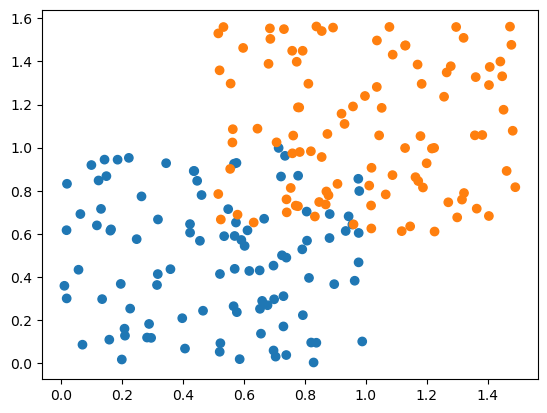

In [16]:
plt.scatter(final_df['feature1'], final_df['feature2'], c = colors)

In [17]:
final_df.loc[200] = [1.1, 0.7, 2]

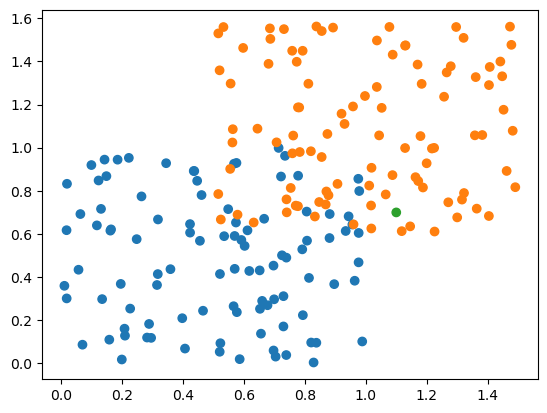

In [18]:
plt.scatter(final_df['feature1'], final_df['feature2'], c = colors + ['C2'])

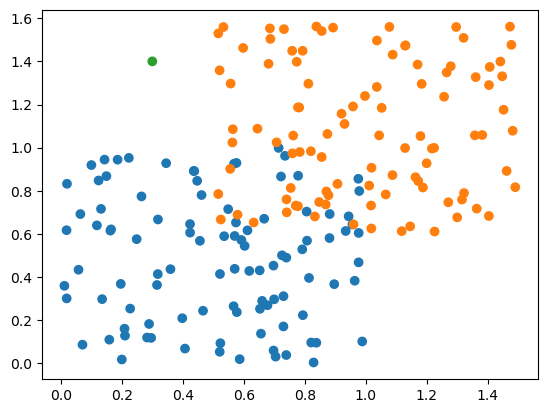

In [19]:
final_df.loc[200] = [0.3, 1.4, 2]
plt.scatter(final_df['feature1'], final_df['feature2'], c = colors + ['C2'])

In [24]:
test_row = final_df.iloc[-1]
train_df = final_df.iloc[:-1]

closest_dist = 9999999
closest_label = -1
closest_id = -1

for i in range(len(train_df)):
    train_row = train_df.iloc[i]
    dist = (train_row['feature1'] - test_row['feature1'])**2 + (train_row['feature2'] - test_row['feature2'])**2
    dist = np.sqrt(dist)
    
    if dist < closest_dist:
        closest_dist = dist
        closest_label = train_row['label']
        closest_id = i

print('Closest distance: ', closest_dist)
print('Closest ID: ', closest_id)
print('Predicted label: ', closest_label)

Closest distance:  0.2245422009817236
Closest ID:  107
Predicted label:  1.0


In [28]:
new_colors = ['blue'] * 100 + ['orange'] * 100 + ['green']

In [30]:
new_colors[closest_id] = 'red'

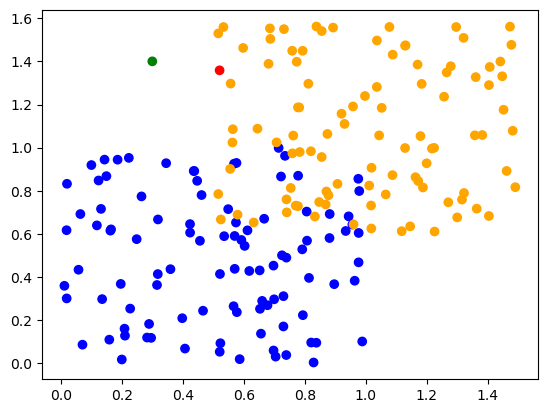

In [31]:
plt.scatter(final_df['feature1'], final_df['feature2'], c = new_colors)

# In Class Exercise - Find top 5 k-nearest neighbor

In [44]:
test_row = final_df.iloc[-1]
train_df = final_df.iloc[:-1]

K = 5

neighbor_dist_list = [9999999] * K
neighbor_label_list = [-1] * K
neighbor_id_list = [-1] * K

for i in range(len(train_df)):
    train_row = train_df.iloc[i]
    dist = (train_row['feature1'] - test_row['feature1'])**2 + (train_row['feature2'] - test_row['feature2'])**2
    dist = np.sqrt(dist)
    
    if dist < neighbor_dist_list[-1]:
        for j in range(K):
            if dist < neighbor_dist_list[j]:
                for l in reversed(range(j + 1, K)):
                    neighbor_dist_list[l] = neighbor_dist_list[l-1]
                    neighbor_label_list[l] = neighbor_label_list[l-1]
                    neighbor_id_list[l] = neighbor_id_list[l-1]
                neighbor_dist_list[j] = dist
                neighbor_label_list[j] = train_row['label']
                neighbor_id_list[j] = i
                break

print(f'{K}-nearest neighbor distances: ', neighbor_dist_list)
print(f'{K}-nearest neighbor ids: ', neighbor_id_list)
print(f'{K}-nearest neighbor labels: ', neighbor_label_list)

5-nearest neighbor distances:  [0.2245422009817236, 0.25222931723682396, 0.2767318242987538, 0.28232349285741704, 0.3042681741206734]
5-nearest neighbor ids:  [107, 131, 166, 197, 148]
5-nearest neighbor labels:  [1.0, 1.0, 1.0, 1.0, 1.0]


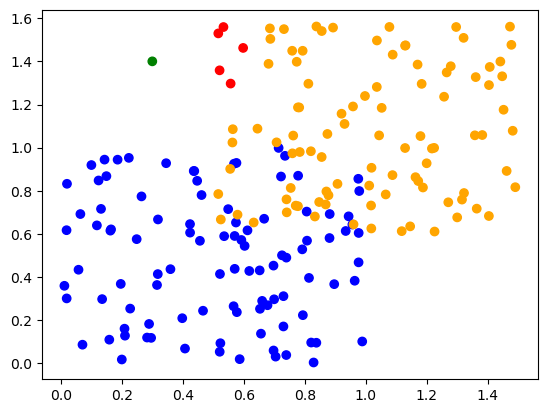

In [45]:
new_colors2 = ['blue'] * 100 + ['orange'] * 100 + ['green']

for i in neighbor_id_list:
    new_colors2[i] = 'red'
plt.scatter(final_df['feature1'], final_df['feature2'], c = new_colors2)

In [59]:
final_df.loc[200] = [1.0, 0.7, 2]

In [60]:
test_row = final_df.iloc[-1]
train_df = final_df.iloc[:-1]

K = 5

neighbor_dist_list = [9999999] * K
neighbor_label_list = [-1] * K
neighbor_id_list = [-1] * K

for i in range(len(train_df)):
    train_row = train_df.iloc[i]
    dist = (train_row['feature1'] - test_row['feature1'])**2 + (train_row['feature2'] - test_row['feature2'])**2
    dist = np.sqrt(dist)
    
    if dist < neighbor_dist_list[-1]:
        for j in range(K):
            if dist < neighbor_dist_list[j]:
                for l in reversed(range(j + 1, K)):
                    neighbor_dist_list[l] = neighbor_dist_list[l-1]
                    neighbor_label_list[l] = neighbor_label_list[l-1]
                    neighbor_id_list[l] = neighbor_id_list[l-1]
                neighbor_dist_list[j] = dist
                neighbor_label_list[j] = train_row['label']
                neighbor_id_list[j] = i
                break

print(f'{K}-nearest neighbor distances: ', neighbor_dist_list)
print(f'{K}-nearest neighbor ids: ', neighbor_id_list)
print(f'{K}-nearest neighbor labels: ', neighbor_label_list)

5-nearest neighbor distances:  [0.03647460500181245, 0.05911666597063549, 0.06840575444636365, 0.07117404668458112, 0.07653298291995356]
5-nearest neighbor ids:  [121, 19, 171, 61, 116]
5-nearest neighbor labels:  [1.0, 0.0, 1.0, 0.0, 1.0]


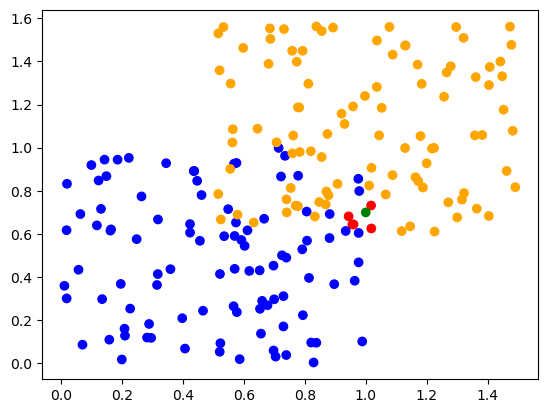

In [61]:
new_colors2 = ['blue'] * 100 + ['orange'] * 100 + ['green']

for i in neighbor_id_list:
    new_colors2[i] = 'red'
plt.scatter(final_df['feature1'], final_df['feature2'], c = new_colors2)

# Scy-kit Learn Package for K-Nearest Neighbors

In [62]:
from sklearn import neighbors

model = neighbors.KNeighborsClassifier(5)

In [63]:
final_df.head()

,feature1,feature2,label
0,0.548814,0.715189,0.0
1,0.602763,0.544883,0.0
2,0.423655,0.645894,0.0
3,0.437587,0.891773,0.0
4,0.963663,0.383442,0.0


In [64]:
train_df = final_df.iloc[:-1]

features = ['feature1', 'feature2']

In [65]:
train_X = train_df[features]

In [66]:
train_X

,feature1,feature2
0,0.548814,0.715189
1,0.602763,0.544883
2,0.423655,0.645894
3,0.437587,0.891773
4,0.963663,0.383442
...,...,...
195,0.562713,1.024032
196,0.758684,1.449038
197,0.533305,1.558983
198,0.855369,0.956707


In [67]:
train_Y = train_df['label']

In [68]:
train_Y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
195    1.0
196    1.0
197    1.0
198    1.0
199    1.0
Name: label, Length: 200, dtype: float64

In [69]:
model.fit(train_X, train_Y)

KNeighborsClassifier()

In [70]:
test_df = final_df.iloc[len(final_df) - 1:]
test_X = test_df[features]
test_Y = test_df['label']

In [71]:
model.predict(test_X)

array([1.])

In [72]:
model.kneighbors(test_X)

(array([[0.03647461, 0.05911667, 0.06840575, 0.07117405, 0.07653298]]),
 array([[121,  19, 171,  61, 116]]))

In [74]:
model.predict_proba(test_X)

array([[0.4, 0.6]])

### Make new group of data points

In [81]:
feature1 = []
feature2 = []

for f1 in np.arange(-0.1, 1.6, .05):
    for f2 in np.arange(-0.1, 1.8, .05):
        feature1.append(f1)
        feature2.append(f2)
        
grid_df = pd.DataFrame({'feature1' : feature1, 'feature2' : feature2})

In [82]:
prediction = model.predict(grid_df)

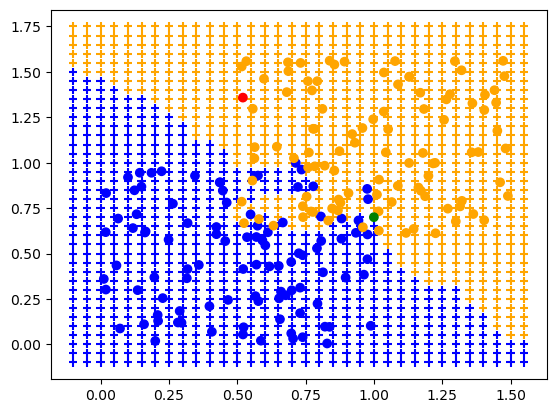

In [84]:
grid_colors = []
for c in prediction:
    if c == 0:
        grid_colors.append('blue')
    else:
        grid_colors.append('orange')
        
plt.scatter(grid_df['feature1'], grid_df['feature2'], marker = '+', c = grid_colors)
plt.scatter(final_df['feature1'], final_df['feature2'], c = new_colors)

# Use Real World Data Now

In [ ]:
df = pd.read_csv('fruit_data.csv')

In [ ]:
train_df = df[:35]
test_df = df[35:]

In [ ]:
model = neighbors.KNeighborsClassifier(5)
features = ['mass', 'width', 'height', 'color_score']
train_X = train_df[features]
train_Y = train_df['fruit_label']
model.fit(train_X, train_Y)

test_X = test_df[features]
test_Y = test_df['fruit_label']

prediction = model.predict(test_X)

In [ ]:
(prediction == test_Y).mean()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScale()
scaler.fit(train_X)

scaled_train_X = scaler.transform(train_X)
scaled_test_X = scaler.transform(test_X)

In [ ]:
train_X.head()

In [ ]:
test_X.head()

In [ ]:
model = neighbors.KNeighborsClassifier(5)

model.fit(scaled_train_X, train_Y)

prediction = model.predict(scaled_test_X)

(prediction == test_y).mean()

In [ ]:
from sklearn import metrics

metrics.choen_kappa_Score(test_Y, prediction)

In [ ]:
df.fruit_label.value_counts()